<a href="https://colab.research.google.com/github/danishanis/Text-and-Sentiment-Analysis/blob/master/TextSentimentAnalysis_TwitterData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Text and Sentiment Analysis: Public Opinion on Twitter about the US airlines in 2015

## 1) Data Cleaning
 1. Removing Twitter Handle 
 2. Recplacing Html character codes with an ASCII equivalent
 3. Removing all html tags and attributes
 4. Remmoving all URLs
 5. Converting all charaters in text in lowercase
 6. Removing stopwords

Using Panda's read_csv method to read the data and prepare dataframe 

In [0]:
import pandas as pd
gt= pd.read_csv('generic_tweets.txt')
ust= pd.read_csv('US_airline_tweets.csv')

#### Exploring the dataframe

It is a good practice to mention the number of imported rows to check with the original data

In [0]:
gt.info() #200000 rows imported

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
class    200000 non-null int64
id       200000 non-null int64
date     200000 non-null object
query    200000 non-null object
user     200000 non-null object
text     200000 non-null object
dtypes: int64(2), object(4)
memory usage: 9.2+ MB


In [0]:
ust.info() #11541 rows imported

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11541 entries, 0 to 11540
Data columns (total 6 columns):
id                 11541 non-null float64
sentiment          11541 non-null object
negative_reason    9178 non-null object
user               11541 non-null object
retweet_count      11541 non-null int64
text               11541 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 541.1+ KB


In [0]:
gt.head()

,class,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [0]:
gt.tail()

,class,id,date,query,user,text
199995,4,1693956088,Mon May 04 00:27:13 PDT 2009,NO_QUERY,FelineBred,"@jvdouglas haha, no, the remark on maternity ..."
199996,4,1693956096,Mon May 04 00:27:14 PDT 2009,NO_QUERY,softthistle,@altitis and to you!
199997,4,1693956099,Mon May 04 00:27:14 PDT 2009,NO_QUERY,elysion32,Okie doke!! Time for me to escape for the Nort...
199998,4,1693956134,Mon May 04 00:27:14 PDT 2009,NO_QUERY,fancyjessy,"finished the lessons, hooray!"
199999,4,1693956160,Mon May 04 00:27:14 PDT 2009,NO_QUERY,noraezan,Some ppl are just fucking KP0. Cb ! Stop askin...


In [0]:
ust.head()

,id,sentiment,negative_reason,user,retweet_count,text
0,5.703010e+17,positive,NaN,jnardino,0,@VirginAmerica plus you've added commercials t...
1,5.703010e+17,negative,Bad Flight,jnardino,0,@VirginAmerica it's really aggressive to blast...
2,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica and it's a really big bad thing...
3,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...
4,5.703010e+17,positive,NaN,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX..."


In [0]:
ust.tail()

,id,sentiment,negative_reason,user,retweet_count,text
11536,5.695880e+17,negative,Cancelled Flight,RussellsWriting,0,@AmericanAir my flight was Cancelled Flightled...
11537,5.695880e+17,negative,Late Flight,GolfWithWoody,0,@AmericanAir right on cue with the delaysðŸ‘Œ
11538,5.695880e+17,positive,NaN,KristenReenders,0,@AmericanAir thank you we got on a different f...
11539,5.695870e+17,negative,Customer Service Issue,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...
11540,5.695870e+17,negative,Customer Service Issue,SraJackson,0,"@AmericanAir you have my money, you change my ..."


#### Significance of Stop Words removal and the technique used

Stop Words are natural language words that have very little significance or meaning in determining the associated sentiment. Thus, it is vital to remove the stopwords from the text for sentiment analysis. NLTK can be used to remove the Stop Words from the text. However, since the dictionary of English Stop Words included in NLTK is lesser that the provided in the stop_words.txt file, it is preferable to use this file to remove Stop Words and clean data in an efficient manner for the sentiment analysis.

Reading the Stop Words.txt file and preparing a set for the same

In [0]:
sw = open('stop_words.txt','r').read() 
swset = set(sw.split('\n')) 
len(swset)

665

In [0]:
import re
import string
import html
from nltk.tokenize import TweetTokenizer

The TweeTokeinzer from NLTK can not only be used to tokenize the tweet but also to strip the twitter handles from the text and reduce the length of the long repeating characters often found in tweets such as haaaaapyyyyyyyy

In [0]:
tkn = TweetTokenizer(strip_handles=True, reduce_len=True)
gt['text']= gt['text'].apply(lambda x: " ".join(tkn.tokenize(x)))

Converting the HTML character codes with an ASCII equivalent. Here it is vital to convert the HTML codes such as the &lt,&gt, etc to its ASCII equivalent first which are <, > etc. Once the ASCII equivalent is produced. It is later used to clean the HTML Tags which are of the form < tag >. This deletes the tags such as the < strong >, < big > and many more which can otherwise lead to the wrong interpretation of the sentiment. 

In [0]:
gt['text'] = gt['text'].apply(lambda x: " ".join([html.unescape(word) for word in x.split()if "".join(re.split("[^a-zA-Z]*", html.unescape(word))) in word])) #HTML to ASCII
gt['text'][246]

C:\Users\TOSHIBA\Anaconda3\lib\re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


'missed Brent at praise band . No fun to not have the your lead guitarist . <pout>'

Using 'for' loop to access each element of a column row-by-row adds to computational effort/time. Therefore, lamda function was implemented to reduce the computational time in cleaning the data

In [0]:
gt['text']= gt['text'].str.lower() #converting to lower case
gt['text']=gt['text'].str.replace('http\S+| www.\S+','', case=False) #removing URLs
gt['text']= gt['text'].apply(lambda x: " ".join([word for word in x.split() if word not in swset])) #removing stop words
gt['text']= gt['text'].str.replace("<.*?>", "") #removing HTML tags
gt['text']=gt['text'].str.replace('[^A-Za-z0-9\s]','') #removing punctuations
gt.head()

,class,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,awww bummer shoulda david carr third day d
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset update facebook texting cry result scho...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,dived times ball managed save 50 rest bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,body feels itchy fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,behaving mad


#### Note: 
The US Airline Dataset in the file 'US_airline_tweets.csv' will be cleaned later since details such as the airline of a given tweet needs to be extracted before embaring on cleaning the data

---

## 2. Exploratory Analysis

#### Determining the airline of a given tweet
 1. Extracting all the words with @ to extract the US airlines 
 2. Finding the unique list of US Airlines using a to look for all the US airlines mentioned
 3. This analysis assumes that the first encounter with @AirlineName will be the airline of the tweet
 4. Preparing a separate column with the airline name in the give data frame
 5. Exploring the data using visualization

In [0]:
ust.head()

,id,sentiment,negative_reason,user,retweet_count,text
0,5.703010e+17,positive,NaN,jnardino,0,@VirginAmerica plus you've added commercials t...
1,5.703010e+17,negative,Bad Flight,jnardino,0,@VirginAmerica it's really aggressive to blast...
2,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica and it's a really big bad thing...
3,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...
4,5.703010e+17,positive,NaN,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX..."


It is observed from the 'text' column that the airline is mentioned in the tweet as '@' followed by the airline name. Therefore, this pattern will be utilized in identifying the airline in the tweet. The list of airline is obtained using regular expression 


In [0]:
ust_airline=[]
for i in range(len(ust)):
    ust_airline.append(re.findall(r'[@]\w+', ust['text'][i]))
print(ust_airline[515])

['@lindaSWC', '@united']



Inorder of obtain a list of all the airlines mentioned in the tweets, this extracted list is converted to a set to look for each unique airlines mentioned in the tweet

In [0]:
airline_set=set()
for i in range(len(ust_airline)):
    for j in range(len(ust_airline[i])):
       airline_set.add(ust_airline[i][j]) 
print(airline_set)

{'@fly2midway', '@c_istudios', '@MaxAbrahms', '@DeltaAssist', '@kdepetro313', '@nickcunningham1', '@CheerTymeDad', '@JimCramer', '@dfwairport', '@sa_craig', '@airlines', '@bgr1061', '@KyleJudah', '@me', '@TheNateK', '@roxydigital', '@MIDOExhibition', '@Kaha58', '@UCtraveladvisor', '@getmeontop', '@UsAirways', '@Delta', '@DadBoner', '@Unitedâ', '@usaireays', '@PatrichRuben', '@rayja9', '@hotmail', '@eDreams_en', '@stephenrodrick', '@pattonoswalt', '@nytimes', '@AshleyKAtherton', '@EWR', '@JimTrotter_NFL', '@thirty_lives', '@flypdx', '@BrandsSayingBae', '@jmercadoMMA', '@CLTDouglas', '@ErieAirport', '@12am', '@Dumas2TTG', '@TyWinter', '@UnitedAppeals', '@corybronze', '@danahajek', '@CBarrows', '@christinebpc', '@chicagotribune', '@KCIAirport', '@travisamex', '@aegeanairlines', '@USAirways', '@it', '@emilylyonss', '@garcia4chicago', '@Southwest', '@TheVDT', '@TonySimsMMA', '@BA_USA', '@virginmedia', '@NASCAR', '@emxlyy', '@InternJohnRadio', '@dartmedia', '@AirTahitiNui', '@Leopolds_IC', '

In [0]:
for i in range(len(ust_airline)):
    for j in range(len(ust_airline[i])):
        ust_airline[i][j]=ust_airline[i][j].strip('@').lower()


An exhaustive list 'arlist' as defined below is prepared from the set obtained above. This list is used to look up for them in the tweets

In [0]:
arlist= ['virginamerica', 'united', 'southwestair', 'jetblue', 'deltaassist', 'usairways', 'americanair', 'americanairlines', 'silverairwsys', 'alaskaair', 'delta', 'flyfrontier', 'cathaypacific', 'spiritairlines', 'allegiantair', 'aegeanairlines', 'british_birways', 'aircananda']
airline=[]
for i in range(len(ust_airline)):
    for j in range(len(ust_airline[i])):
        if ust_airline[i][j] in arlist:
            airline.append(ust_airline[i][j])
            break


Dictionary of the list of all airlines is prepared below with its value being the correspoing Airline name. This is later used to define a separate column of the airline in the dataframe.

In [0]:
afd= {'virginamerica': 'Virgin America', 'united': 'United Airlines','southwestair': 'Southwest Airlines', 'jetblue': 'jetBlue', 'deltaassist': 'Delta Airlines', 'usairways': 'US Airways', 'americanair': 'American Airlines', 'silverairsys': 'Silver Airlines', 'alaskaair': 'Alaska Air', 'delta': 'Delta Airlines', 'flyfrontier':'Fly Frontier Airlines', 'cathaypacific': 'Cathy Pacific Airlines', 'spiritairlines': 'Spirit Airlines', 'allegiantair': 'Allegiant Airlines', 'aegeanairlines': 'Aegean Airlines', 'british_birways': 'British Airways', 'aircananda': 'Air Canada'}

for i in range(len(airline)):
    if airline[i] in arlist:
        airline[i]= afd[airline[i]]
ust[['Airline']] = pd.DataFrame(airline)
pd.value_counts(ust['Airline'])

United Airlines       3123
US Airways            2532
American Airlines     2296
Southwest Airlines    1757
jetBlue               1496
Virgin America         333
Delta Airlines           2
Name: Airline, dtype: int64

The above-mentioned results gives the count of the US Airline mentioned in the tweets. #######It can be obtained that the ####

### Data Visualization

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

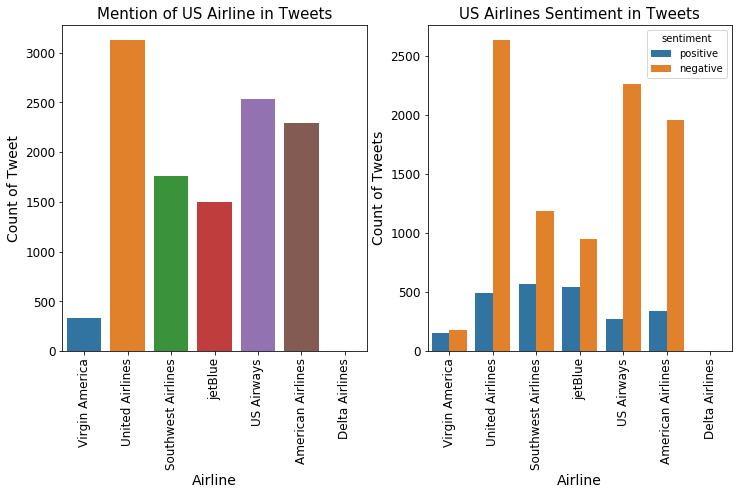

In [0]:
f, axes= plt.subplots(1,2, figsize=(12,6))
p1= sns.countplot(x="Airline", data=ust, ax= axes[0])
p1.axes.set_title("Mention of US Airline in Tweets",fontsize=15)
p1.set_xlabel("Airline",fontsize=14)
p1.set_ylabel("Count of Tweet",fontsize=14)
p1.tick_params(labelsize=12)
p1.set_xticklabels(labels= ust['Airline'].unique(), rotation=90)
p2= sns.countplot(x="Airline", data=ust, hue= 'sentiment', ax= axes[1])
p2.axes.set_title("US Airlines Sentiment in Tweets",fontsize=15)
p2.set_xlabel("Airline",fontsize=14)
p2.set_ylabel("Count of Tweets",fontsize=14)
p2.tick_params(labelsize=12)
p2.set_xticklabels(labels= ust['Airline'].unique(), rotation=90)
plt.show()

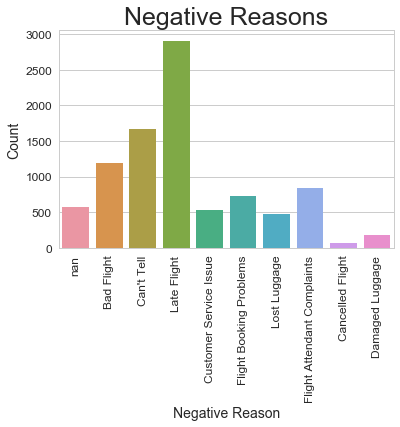

In [0]:
sns.set(style="whitegrid")
ax = sns.countplot(x="negative_reason", data=ust)
ax.axes.set_title("Negative Reasons",fontsize=25)
ax.set_xlabel("Negative Reason",fontsize=14)
ax.set_ylabel("Count",fontsize=14)
ax.set_xticklabels(labels= ust['negative_reason'].unique(), rotation=90)
ax.tick_params(labelsize=12)

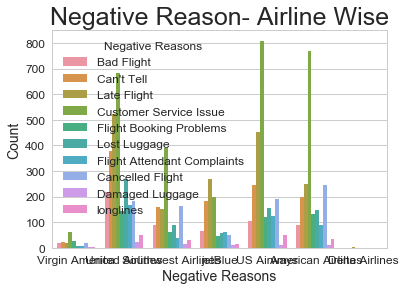

In [0]:
sns.set(style="whitegrid")
ax = sns.countplot(x="Airline", data=ust, hue= 'negative_reason')
ax.axes.set_title("Negative Reason- Airline Wise",fontsize=25)
ax.set_xlabel("Negative Reasons",fontsize=14)
ax.set_ylabel("Count",fontsize=14)
ax.set_xticklabels(labels= ust['Airline'].unique())
plt.legend(loc='best', title= 'Negative Reasons', fontsize= 'medium')
ax.tick_params(labelsize=12)
plt.rcParams['figure.figsize'] = 30,15

## 1. Data Cleaning for the US Airlines Tweet

In [0]:
tkn1 = TweetTokenizer(strip_handles=True, reduce_len=True)
ust['text']= ust['text'].apply(lambda x: " ".join(tkn1.tokenize(x)))
ust['text'] = ust['text'].apply(lambda x: " ".join([html.unescape(word) for word in x.split()if "".join(re.split("[^a-zA-Z]*", html.unescape(word))) in word])) #HTML to ASCII
ust['text']= ust['text'].str.lower() #converting to lower case
ust['text']=ust['text'].str.replace('http\S+| www.\S+','', case=False) #removing URLs
ust['text']= ust['text'].apply(lambda x: " ".join([word for word in x.split() if word not in swset])) #removing stop words
ust['text']= ust['text'].str.replace("<.*?>", "") #removing HTML tags
ust['text']=ust['text'].str.replace('[^A-Za-z0-9\s]','') #removing punctuations
ust.head()

C:\Users\TOSHIBA\Anaconda3\lib\re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


,id,sentiment,negative_reason,user,retweet_count,text,Airline
0,5.703010e+17,positive,NaN,jnardino,0,commercials experience tacky,Virgin America
1,5.703010e+17,negative,Bad Flight,jnardino,0,aggressive blast obnoxious entertainment gue...,Virgin America
2,5.703010e+17,negative,Can't Tell,jnardino,0,big bad thing,Virgin America
3,5.703010e+17,negative,Can't Tell,jnardino,0,seriously pay 30 flight seats playing bad th...,Virgin America
4,5.703010e+17,positive,NaN,cjmcginnis,0,time fly vx ear worm won t,Virgin America


## 2. Exploratory Analysis (continued)

In [0]:
!pip install wordcloud

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [0]:
from wordcloud import WordCloud
import string
import matplotlib.pyplot as plt

# Above- US Tweets: Word Cloud of the collection of all positive Tweets

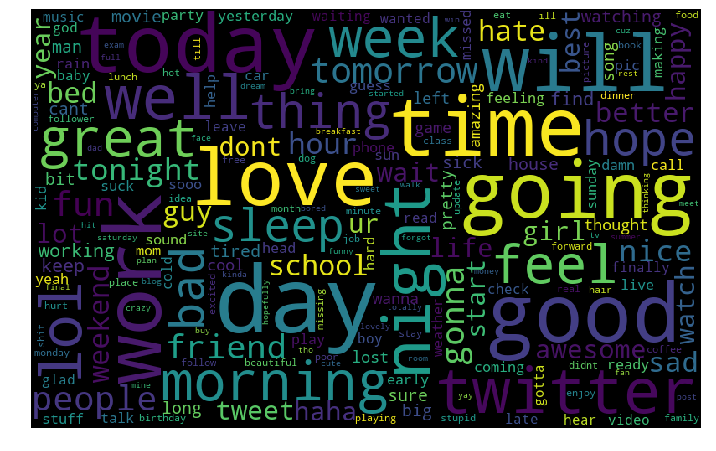

In [0]:
gtall_words = gt['text'].apply(lambda x: ' '.join([text for text in x.split()]))
gtal=''
for i in (gtall_words):
    gtal+=str(i)

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(gtal)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

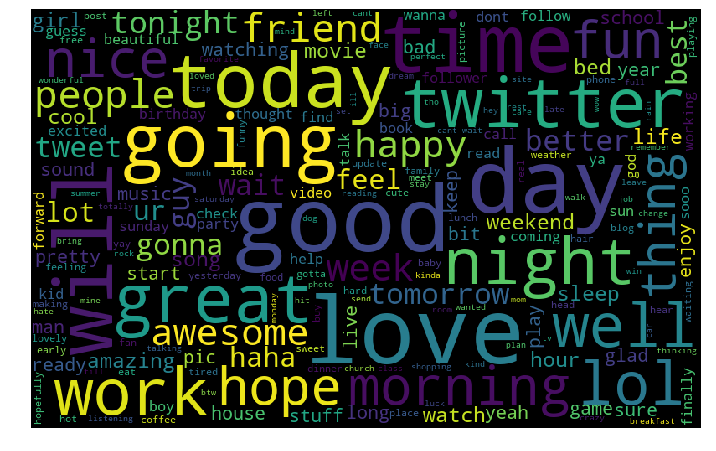

In [0]:
gtpos_words = gt['text'][(gt['class']== 4)].apply(lambda x: ' '.join([text for text in x.split()]))
gtal_pos=''
for i in (gtpos_words):
    gtal_pos+=str(i)

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(gtal_pos)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Above- Generic Tweets: Word Cloud of the collection of positive Tweets

## 3. Model Preparation

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [0]:
X= gt['text']
y= gt['class']

Model Preparation: Now I split the set into a training and testing set using the sklearn's train_test_split function.

Model Training: Then, I use our training set to train (fit) a Logistic Regression model from sklearn. TF-IF Vectorizer is used to vectorize the text and train the model

In [0]:
gt_v= TfidfVectorizer()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
X_train_v= gt_v.fit_transform(X_train)
X_test_v= gt_v.transform(X_test)

## 4. Model Implementation

Logistic regression model is trained on the training data and applied to the test data to obtain an accuracy value. The same model is evaluated on the US airline data to predict the sentiments of the tweets

In [0]:
model= LogisticRegression()
model.fit(X_train_v,y_train)

C:\Users\TOSHIBA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
predictions_gt = model.predict(X_test_v)

In [0]:
score = accuracy_score(y_test,predictions_gt)
print (score*100)

73.99333333333334


In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions_gt))

              precision    recall  f1-score   support

           0       0.76      0.71      0.73     29912
           4       0.73      0.77      0.75     30088

   micro avg       0.74      0.74      0.74     60000
   macro avg       0.74      0.74      0.74     60000
weighted avg       0.74      0.74      0.74     60000



#### US Airline Model Implementation

In [0]:
ust['class']=ust['sentiment'].apply(lambda x: int(0) if x=='negative' else int(4))
ust.head()

,id,sentiment,negative_reason,user,retweet_count,text,Airline,class
0,5.703010e+17,positive,NaN,jnardino,0,commercials experience tacky,Virgin America,4
1,5.703010e+17,negative,Bad Flight,jnardino,0,aggressive blast obnoxious entertainment gue...,Virgin America,0
2,5.703010e+17,negative,Can't Tell,jnardino,0,big bad thing,Virgin America,0
3,5.703010e+17,negative,Can't Tell,jnardino,0,seriously pay 30 flight seats playing bad th...,Virgin America,0
4,5.703010e+17,positive,NaN,cjmcginnis,0,time fly vx ear worm won t,Virgin America,4


In [0]:
x1=ust['text']
y1=ust['class']
X_ustpredict_v= gt_v.transform(x1)
predictions_ust = model.predict(X_ustpredict_v)
score_ust = accuracy_score(y1,predictions_ust)
print (score*100)

73.99333333333334


In [0]:
from sklearn.metrics import classification_report

print(classification_report(y1,predictions_ust))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81      9178
           4       0.42      0.79      0.55      2363

   micro avg       0.73      0.73      0.73     11541
   macro avg       0.68      0.76      0.68     11541
weighted avg       0.83      0.73      0.76     11541



In [0]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y1,predictions_ust))

[[6590 2588]
 [ 487 1876]]


In [0]:
resultsDF_ust= pd.DataFrame({
        'true':y1,
        'predicted':predictions_ust, 'Airline': ust['Airline'], 'text': ust['text']
    })
resultsDF_ust.head()

,true,predicted,Airline,text
0,4,0,Virgin America,commercials experience tacky
1,0,4,Virgin America,aggressive blast obnoxious entertainment gue...
2,0,0,Virgin America,big bad thing
3,0,0,Virgin America,seriously pay 30 flight seats playing bad th...
4,4,4,Virgin America,time fly vx ear worm won t


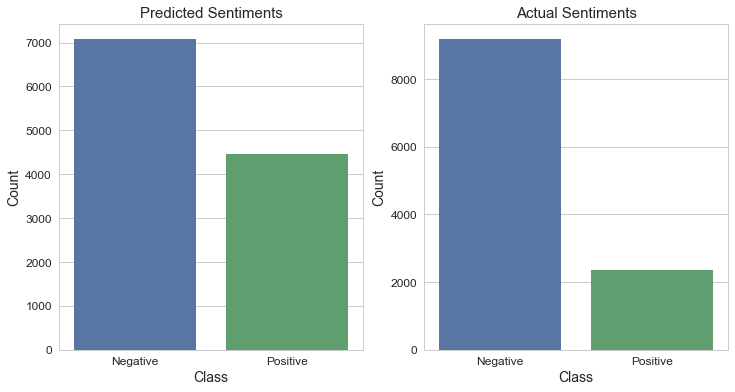

In [0]:
f, axes= plt.subplots(1,2, figsize=(12,6))
p1= sns.countplot(x="predicted", data=resultsDF_ust, ax= axes[0])
p1.axes.set_title("Predicted Sentiments",fontsize=15)
p1.set_xlabel("Class",fontsize=14)
p1.set_ylabel("Count",fontsize=14)
p1.tick_params(labelsize=12)
p1.set_xticklabels(labels= ['Negative', 'Positive'])
p1= sns.countplot(x="true", data=resultsDF_ust, ax= axes[1])
p1.axes.set_title("Actual Sentiments",fontsize=15)
p1.set_xlabel("Class",fontsize=14)
p1.set_ylabel("Count",fontsize=14)
p1.tick_params(labelsize=12)
p1.set_xticklabels(labels= ['Negative', 'Positive'])
plt.show()

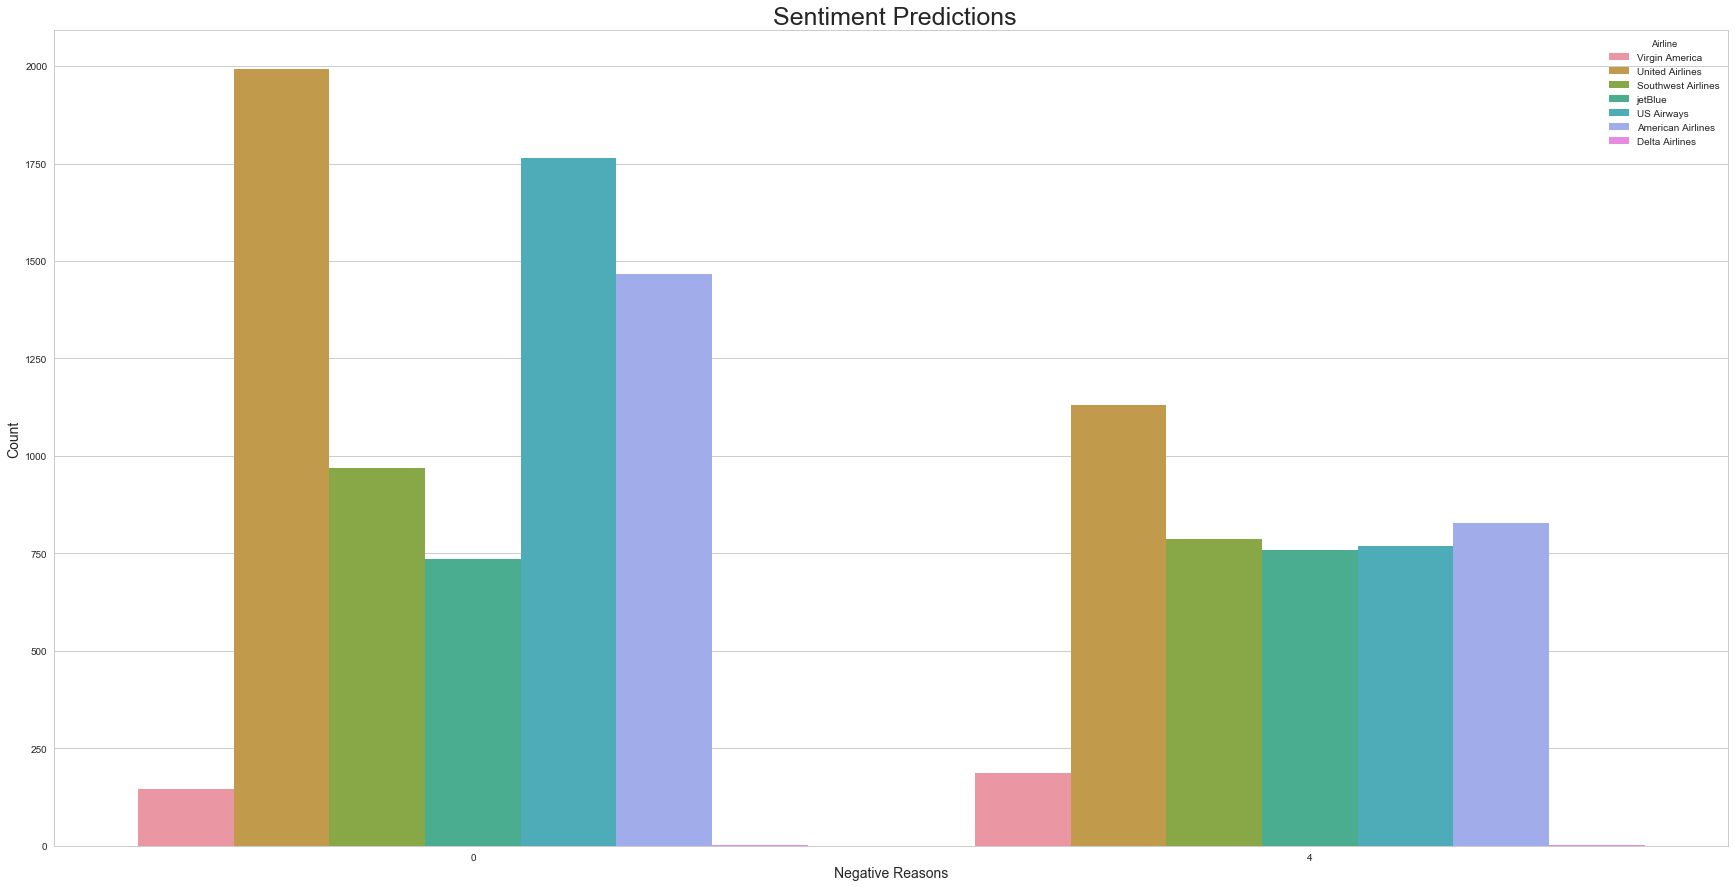

In [0]:
sns.set(style="whitegrid")
ax = sns.countplot(x="predicted", data=resultsDF_ust, hue= 'Airline')
ax.axes.set_title(" Sentiment Predictions",fontsize=25)
ax.set_xlabel("Negative Reasons",fontsize=14)
ax.set_ylabel("Count",fontsize=14)
p1.set_xticklabels(labels= ['Negative', 'Positive'])
plt.show()
plt.rcParams['figure.figsize'] = 16,8

#### Multiclass Losgistic Regression

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

In [0]:
ust_neg= ust[ust['sentiment'] == 'negative']
ust_neg.head()

,id,sentiment,negative_reason,user,retweet_count,text,Airline,class
1,5.703010e+17,negative,Bad Flight,jnardino,0,aggressive blast obnoxious entertainment gue...,Virgin America,0
2,5.703010e+17,negative,Can't Tell,jnardino,0,big bad thing,Virgin America,0
3,5.703010e+17,negative,Can't Tell,jnardino,0,seriously pay 30 flight seats playing bad th...,Virgin America,0
11,5.702820e+17,negative,Late Flight,smartwatermelon,0,schedule mia,Virgin America,0
13,5.702770e+17,negative,Bad Flight,heatherovieda,0,flew nyc sfo week fully sit seat large gentlem...,Virgin America,0


In [0]:
ust_neg=ust_neg.reset_index(drop=True)
ust_neg.head()

,id,sentiment,negative_reason,user,retweet_count,text,Airline,class
0,5.703010e+17,negative,Bad Flight,jnardino,0,aggressive blast obnoxious entertainment gue...,Virgin America,0
1,5.703010e+17,negative,Can't Tell,jnardino,0,big bad thing,Virgin America,0
2,5.703010e+17,negative,Can't Tell,jnardino,0,seriously pay 30 flight seats playing bad th...,Virgin America,0
3,5.702820e+17,negative,Late Flight,smartwatermelon,0,schedule mia,Virgin America,0
4,5.702770e+17,negative,Bad Flight,heatherovieda,0,flew nyc sfo week fully sit seat large gentlem...,Virgin America,0


In [0]:
ust_neg['negative_reason'] = ust_neg['negative_reason'].astype('category')

In [0]:
ust_neg['negative_reason'].cat.categories

Index(['Bad Flight', 'Can't Tell', 'Cancelled Flight',
       'Customer Service Issue', 'Damaged Luggage',
       'Flight Attendant Complaints', 'Flight Booking Problems', 'Late Flight',
       'Lost Luggage', 'longlines'],
      dtype='object')

In [0]:
ust_neg['negative_reason'].unique()

[Bad Flight, Can't Tell, Late Flight, Customer Service Issue, Flight Booking Problems, Lost Luggage, Flight Attendant Complaints, Cancelled Flight, Damaged Luggage, longlines]
Categories (10, object): [Bad Flight, Can't Tell, Late Flight, Customer Service Issue, ..., Flight Attendant Complaints, Cancelled Flight, Damaged Luggage, longlines]

In [0]:
ust_neg['negative_reason'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negative_reason, dtype: int64

In [0]:
X2 = ust_neg['text']
y2 = ust_neg['negative_reason']

#### Stratify feature is used to see to it that see to it that all the all the data in the test data is equally disctributed

In [0]:
ust_v= TfidfVectorizer()
X_train, X_test, y_train, y_test = train_test_split(X2,y2,test_size=0.3, random_state=101, stratify=y2)
X_train_v= ust_v.fit_transform(X_train)
X_test_v= ust_v.transform(X_test)

In [0]:
model= LogisticRegression()
model.fit(X_train_v,y_train)

C:\Users\TOSHIBA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\TOSHIBA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
predictions = model.predict(X_test_v)

In [0]:
score = accuracy_score(y_test,predictions)
print (score*100)

59.76761074800291


In [0]:
#ust_neg['predictions']= prediction

In [0]:
len(ust_neg), len(predictions)

(9178, 2754)

In [0]:
resultsDF1 = pd.DataFrame({
        'true':y_test,
        'predicted':predictions
    })
resultsDF1['predicted'][resultsDF1['true']=='Damaged Luggage']

4046    Customer Service Issue
1833    Customer Service Issue
3565              Lost Luggage
1200    Customer Service Issue
6841              Lost Luggage
2612    Customer Service Issue
8279    Customer Service Issue
901               Lost Luggage
6911              Lost Luggage
3863              Lost Luggage
4755    Customer Service Issue
4926              Lost Luggage
2779              Lost Luggage
3063               Late Flight
2649              Lost Luggage
7635              Lost Luggage
4784              Lost Luggage
3182               Late Flight
5806              Lost Luggage
6178                Can't Tell
1719    Customer Service Issue
4786    Customer Service Issue
Name: predicted, dtype: object

In [0]:
ust_neg[3565:3568]

,id,sentiment,negative_reason,user,retweet_count,text,Airline,class
3565,5.686090e+17,negative,Damaged Luggage,pwdersno,0,picked bag seatac clothes soaking wet bagawim,Southwest Airlines,0
3566,5.686050e+17,negative,Customer Service Issue,julianguilfoyle,0,offering absolutely troubles blames,Southwest Airlines,0
3567,5.686040e+17,negative,Can't Tell,mrssuperdimmock,0,link work,Southwest Airlines,0


In [0]:
ust_neg[4044:4048]

,id,sentiment,negative_reason,user,retweet_count,text,Airline,class
4044,5.700670e+17,negative,Late Flight,djcheros,0,air plane redirected mechanical errors aka de...,jetBlue,0
4045,5.700660e+17,negative,Late Flight,djcheros,0,delay flights redirect gate stuck original g...,jetBlue,0
4046,5.700660e+17,negative,Damaged Luggage,DarthVada_R2D2,0,definitely note stole,jetBlue,0
4047,5.700650e+17,negative,Customer Service Issue,DarthVada_R2D2,0,4 hour policy called report changed noticed ...,jetBlue,0


In [0]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
print(cm)

[[ 41  27   1  61   0   3   2  35   4   0]
 [  9 112   4 186   0   1   5  26  14   0]
 [  2  13 181  30   0   0   1  23   4   0]
 [  7  49  24 736   0   1  12  33  11   0]
 [  0   1   0   8   0   0   0   2  11   0]
 [  5  16   0  66   0  32   1  17   7   0]
 [  2  18   7  90   0   0  27  15   0   0]
 [  4  32   7  76   0   0   0 374   7   0]
 [  2  14   2  43   0   0   0  14 142   0]
 [  0   2   1  19   0   0   1  21   9   1]]


In [0]:
cmDF = pd.DataFrame()

for i, row in enumerate(y2.cat.categories):
    temp = {}
    for j, col in enumerate(y2.cat.categories): 
        temp[col]=cm[i,j]
    cmDF = cmDF.append(pd.DataFrame.from_dict({row:temp}, orient='index'))

print(cmDF)

                             Bad Flight  Can't Tell  Cancelled Flight  \
Bad Flight                           41          27                 1   
Can't Tell                            9         112                 4   
Cancelled Flight                      2          13               181   
Customer Service Issue                7          49                24   
Damaged Luggage                       0           1                 0   
Flight Attendant Complaints           5          16                 0   
Flight Booking Problems               2          18                 7   
Late Flight                           4          32                 7   
Lost Luggage                          2          14                 2   
longlines                             0           2                 1   

                             Customer Service Issue  Damaged Luggage  \
Bad Flight                                       61                0   
Can't Tell                                      186 

In [0]:
print(classification_report(y_test,predictions))

                             precision    recall  f1-score   support

                 Bad Flight       0.57      0.24      0.33       174
                 Can't Tell       0.39      0.31      0.35       357
           Cancelled Flight       0.80      0.71      0.75       254
     Customer Service Issue       0.56      0.84      0.67       873
            Damaged Luggage       0.00      0.00      0.00        22
Flight Attendant Complaints       0.86      0.22      0.35       144
    Flight Booking Problems       0.55      0.17      0.26       159
                Late Flight       0.67      0.75      0.71       500
               Lost Luggage       0.68      0.65      0.67       217
                  longlines       1.00      0.02      0.04        54

                  micro avg       0.60      0.60      0.60      2754
                  macro avg       0.61      0.39      0.41      2754
               weighted avg       0.61      0.60      0.56      2754



C:\Users\TOSHIBA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\TOSHIBA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\TOSHIBA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Based on the classification report, the precision of the Negative Reason as Damaged Luggage was 0.0. Which suggestes that all of its predictions were incorrect. The model was not able to predict this reason because the firstly, the model has very few  number of the tweets with the negative reason as 'Damaged Luggage' for it to learn from the model

In [0]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

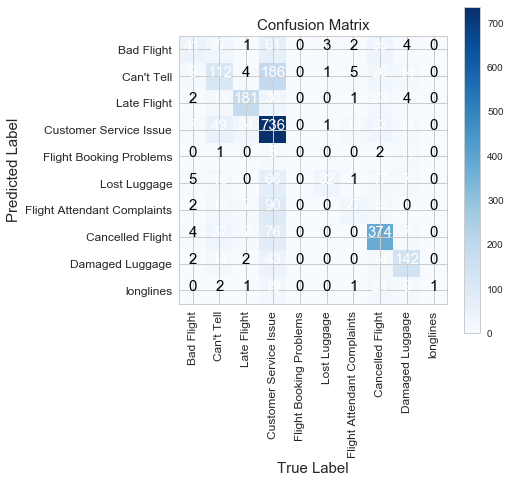

In [0]:
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y2.unique()))
plt.xticks(tick_marks, y2.unique(), rotation=90, fontsize=12)
plt.yticks(tick_marks, y2.unique(), fontsize=12)
plt.xlabel('True Label', fontsize=15)
plt.ylabel('Predicted Label', fontsize=15)

for i in range(len(cm)):
    for j in range(len(cm[i])):
        color = 'black'   
        if cm[i][j] > 5:
            color = 'white'
        plt.text(j, i, format(cm[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)

In [0]:
bin_y = label_binarize(y2, classes=y2.cat.categories)
bin_y[:20]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X2, bin_y, test_size=0.3, random_state=101, stratify= bin_y)

In [0]:
X_train_v= ust_v.fit_transform(X_train)
X_test_v= ust_v.transform(X_test)

In [0]:
model = OneVsRestClassifier(LogisticRegression())
model.fit(X_train_v, y_train)

C:\Users\TOSHIBA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None)

In [0]:
y_score = model.decision_function(X_test_v)

In [0]:
TPR, FPR, AUC = {}, {}, {}

for i in range(len(y2.cat.categories)):
    FPR[i], TPR[i], _ = roc_curve(y_test[:,i], y_score[:,i])
    AUC[i] = auc(FPR[i], TPR[i])

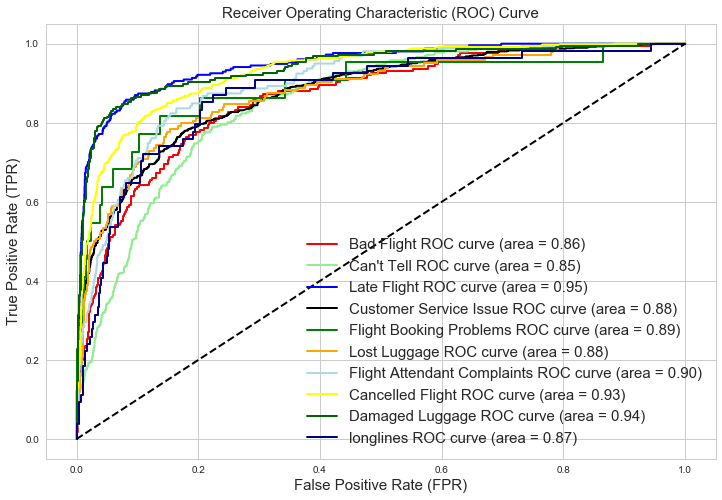

In [0]:
plt.figure(figsize=(12,8))
colors = ['red','lightgreen','blue', 'black', 'green', 'orange', 'lightblue', 'yellow', 'darkgreen', 'darkblue']
for i in range(len(y2.unique())):
    plt.plot(FPR[i], TPR[i], color=colors[i], lw=2, label='%s ROC curve (area = %0.2f)' % (y2.unique()[i],AUC[i]))
plt.plot([0,1], [0,1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)', fontsize=15)
plt.ylabel('True Positive Rate (TPR)', fontsize=15)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=15)
plt.legend(loc=4, fontsize=15)

From the ROC curve obtained from this model, it can be easliy concluded that since the most of the curve depicted in the curve passes well from the top left corner of with higher %TPR and lower %FPR, the was making predictions accurately.


## 5. Discussion

### What can public opinion on Twitter tell us about the US airlines in 2015?

From the model implementation of the first model and the predictions obtained on the US Airlines Tweet it can be clearly concluded that the number of negative sentiment were significantly higher than that of the positive sentiments. This shows that people expressed more negative sentiments on twitter as compared to that of the postive sentiments. Moreover, United Airlines had the highest number of tweets. 

The predicted number of negative sentiments for the US Airlines were 7042, on the other hand the actual number of negative sentiments were 9178.
The predicted number of positve sentiments for the US Airlines were 4499, on the other hand the actual number of negative sentiments were 2363.

The mention of the different US Airline in the tweets is mentioned herewith:
United Airlines 3123, US Airways 2532, American Airlines 2296, Southwest Airlines 1757, jetBlue 1496, Virgin America 333, Delta Airlines 2. Of these tweets the predicted number of positive tweets from each airline are as follows: United Airlines 1155, US Airways 772, American Airlines 817, Southwest Airlines 797, jetBlue 764, Virgin America 192, Delta Airlines 1. The predicted number of negative tweets from each airline are as follows: United Airlines 1968, US Airways 1760, American Airlines 1479, Southwest Airlines 960, jetBlue 732, Virgin America 141, Delta Airlines 1

As per the predictions on the US Airlines tweets, United Airlines has the highest number of the negative tweets. However, this is due to the fact that the total number of tweets of the US Airlines is the highest. The predicted percentage of the negative tweets for each airlines are as follows: United Airlines 63%, US Airways 69.5%, American Airlines 64.4%, Southwest Airlines 54.6%, jetBlue 48.9%, Virgin America 42.3%, Delta Airlines 50%. Thus, as per the predictions, US Airways has highest percentage of the negative tweets which is 69.5%

For your second model, if there are any tweets for which the model failed to predict the correct
negative reason, explain why. Justify your explanation with a few examples from the test
sets.

### Failure of predict the correct negative in the second model
Based on the classification report, the precision of the Negative Reason as Damaged Luggage was 0.0. Which suggestes that all of its predictions were incorrect. The model was not able to predict this reason because the firstly, the model has very few  number of the tweets with the negative reason as 'Damaged Luggage' for it to learn from the model. Moreover, if seen the tweet- 'definite note stole' was belonging to this reason. However, it predicted this as customer service issue as the tweet had no hint of the luggage. Also, the with the ten reasons to decide from, the accuracy of the model is further compormised. 

From the ROC curve obtained from this model, it can be easliy concluded that since the most of the curve depicted in the curve passes well from the top left corner of with higher %TPR and lower %FPR, the was making predictions accurately.
 
### Suggestion to improve the accuracy of both models
 1. The model used in both the model here was the TF-IDF model which had better prediction capabilities as compared to that of the model based on the frequency of the words or n-gram model. However, the accuracy of the this model can be further imporved by refining the data more regriously. This inculdes features such as stemming of the words. Moreover, this model acan further be imporved by lemmatization which is even more better option as compared to the stemming because it converts the word into its root word, rather than just stripping the suffices. Also, the n-gram feature in TFIDF vectorizer can be used to add the n-gram feature to the model and this will make the model more effective in learning and predicting.
 2. The second model is the multiclass logistic regression model. It had 10 different negative reasons to predict from. Give this many choices to predict from, the probability of making an accurate prediction is bleak. Moreover, few classes may not have enough data to learn from which further decreases its accuracy. Thus, it is preferred to combine the classes which are overlapping or can be merged together without any ambiguity. This leads to the reducing the the number of classes to make decision from and thus increases the probability of giving a correct prediction.